In [ ]:
import sys
sys.path.append('..')
import pandas as pd
import matplotlib.pyplot as plt
import foodcosts.core as core
import datetime

In [ ]:
events_of_shops = core.get_query_res_as_pd("""
    SELECT
        v_shop.name,
        sale_order.state,
        TO_CHAR(sale_order.create_date, 'YYYY-MM') AS month,
        SUM(sale_order.amount_total)
    FROM
        sale_order
    LEFT JOIN v_shop_employee ON sale_order.create_uid = v_shop_employee.id
    LEFT JOIN v_shop ON v_shop_employee.shop_id = v_shop.id
    where
        (sale_order.create_date BETWEEN current_date - INTERVAL '12 months' AND current_date)
        AND v_shop.name IS NOT null
        AND v_shop.name NOT IN('ATELIER','PAVLOVA BAR ANVERS')
    GROUP by
        v_shop.name,
        sale_order.state,
        month
    ORDER BY name, month;
""")

config.ini file available... using that


In [ ]:
events_of_re_restaurant = core.get_query_res_as_pd("""
    SELECT
        v_resto_entreprise.name,
        sale_order.state,
        TO_CHAR(sale_order.create_date, 'YYYY-MM') AS month,
        SUM(sale_order.amount_total)
    FROM
        sale_order
    LEFT JOIN v_shop_employee ON sale_order.create_uid = v_shop_employee.id
    LEFT JOIN v_resto_entreprise ON v_shop_employee.shop_id = v_resto_entreprise.id
    where
        (sale_order.create_date BETWEEN current_date - INTERVAL '12 months' AND current_date)
        AND v_resto_entreprise.name IS NOT null
    GROUP by
        v_resto_entreprise.name,
        sale_order.state,
        month
    ORDER BY name, month;
""")

config.ini file available... using that


In [ ]:
def get_cumulative_considered_state(considered_state):
    state_dict = {
        "Sale and Sent": ['sale', 'sent'],
        "Cancel": ['cancel'],
        "Draft": ['draft'],
    }

    return sum([state_dict[state] for state in considered_state if state in state_dict], [])

def display_table(considered_state, considered_month, events):
    cumulative_considered_states = get_cumulative_considered_state(considered_state)
    
    considered_events = events[events['state'].isin(cumulative_considered_states)];
    considered_events = considered_events[considered_events['month'] == considered_month];
    
    sum_of_event = considered_events.groupby(['name']).sum().reset_index()
    
    display(sum_of_event)

In [ ]:
#Select the conidered state
considered_state = [
    "Sale and Sent",
#     "Cancel",
#     "Draft",
]

#Select the conidered month
considered_month = '2023-01'

In [ ]:
#5: table for events made in shops
display_table(considered_state, considered_month, events_of_shops)

,name,sum
0,CHATELAIN,12961.98
1,Fort Jaco,18647.74
2,LATEM,5302.34
3,La Hulpe,50008.78
4,OVERIJSE,7556.26
5,Tongres,1508.86
6,Wemmel,5157.28
7,Woluwe,16571.95


In [ ]:
#6: table for events made in corporate restaurants
display_table(considered_state, considered_month, events_of_re_restaurant)

,name,sum
0,Immogra Park7,3620.02
1,R.E. CEFIC,88.10
2,R.E. GLAVERBEL,1921.60
3,R.E. LHOIST CORBAIS,658.29
4,R.E. ZAVENTEM,3305.78


In [ ]:
#7: show an evolution across time for a given shop

In [ ]:
def show_plot(df, name):
    ax = df[['month', 'avg', 'sum']].plot(kind='bar', x='month', title='Evolution of ' + name)
    ax.set_xlabel('Key')
    ax.set_ylabel('Value')
    plt.show()

def display_graphs(considered_state, events, selected_outlets, total_outlet):
    cumulative_considered_state = get_cumulative_considered_state(considered_state)
    
    filtered_events_with_considered_state = events[events['state'].isin(cumulative_considered_state)];

    event_sum_by_month = filtered_events_with_considered_state.groupby(['month']).sum().reset_index()
    event_sum_by_month['sum'] = event_sum_by_month['sum'] / total_outlet
    avg_event_sum_by_month = event_sum_by_month.rename(columns={'sum': 'avg'})

    for outlet in selected_outlets:
        events_of_outlet = filtered_events_with_considered_state[filtered_events_with_considered_state['name'].isin([outlet])];
        event_sum_for_outlet = events_of_outlet.groupby(['month']).sum().reset_index()
        
        merged_df = pd.merge(avg_event_sum_by_month, event_sum_for_outlet, on='month')
    
        if not merged_df.empty:
            show_plot(merged_df, outlet)

In [ ]:
shop_list =  core.get_shop_names()
re_restaurant_list = [name for (i, name) in core.make_sql_query("select * from v_resto_entreprise")]

config.ini file available... using that
config.ini file available... using that


In [ ]:
#Select the conidered state for graph
considered_state_for_graphs = [
    "Sale and Sent",
#     "Cancel",
#     "Draft",
]

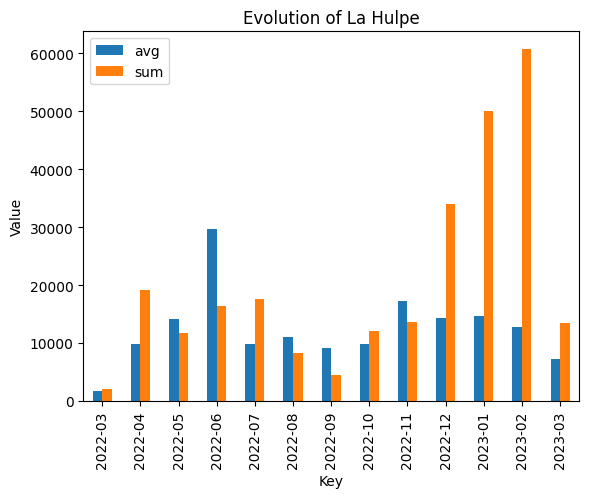

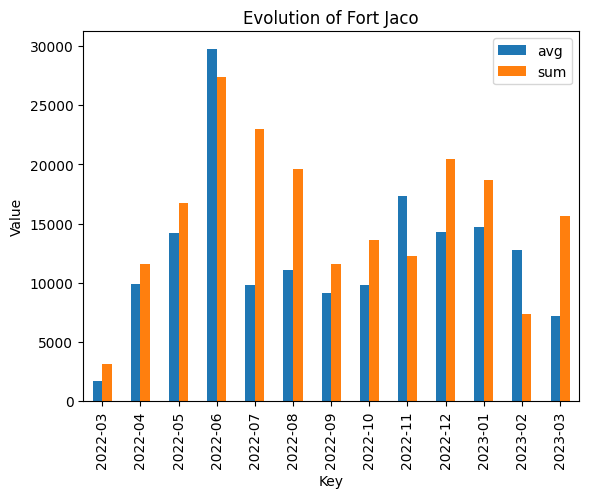

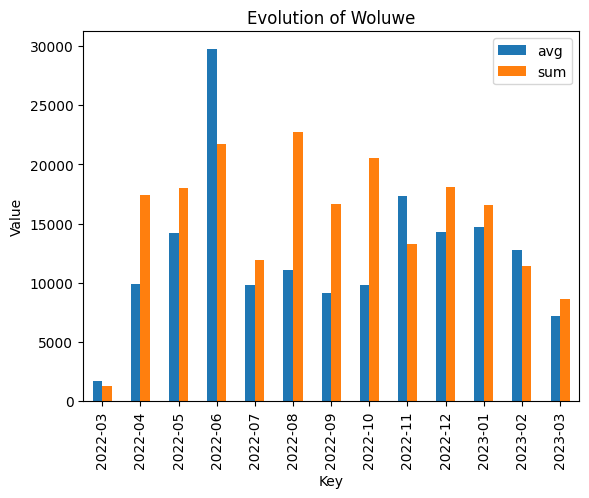

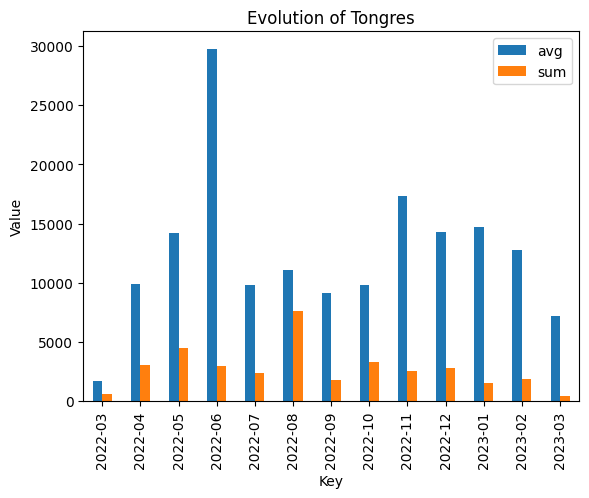

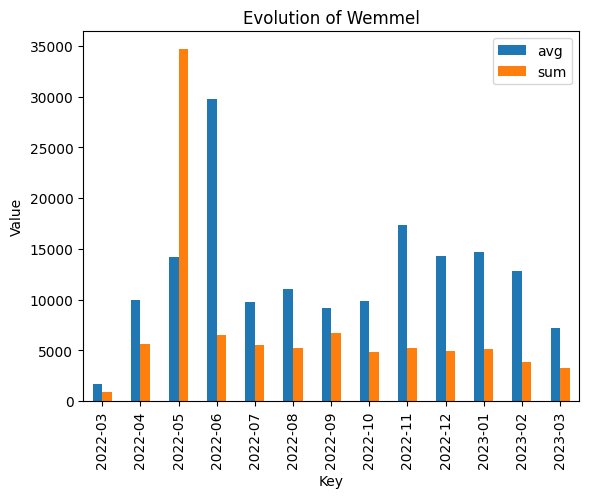

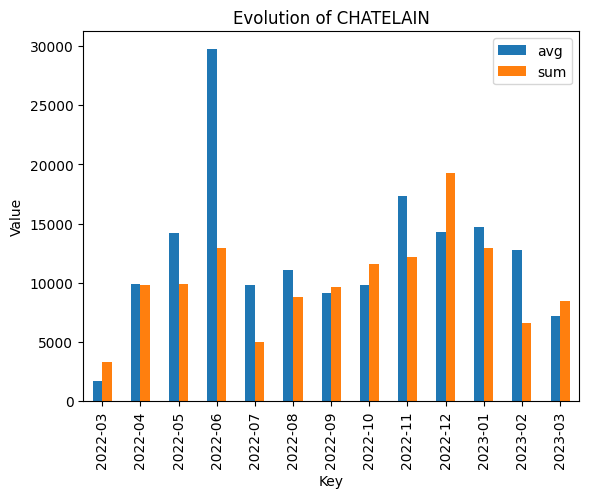

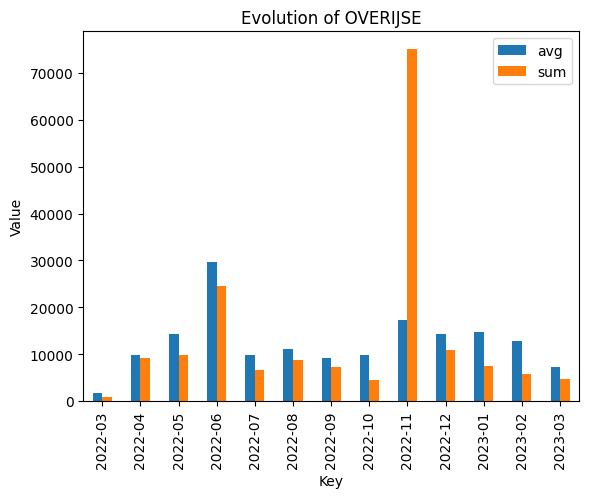

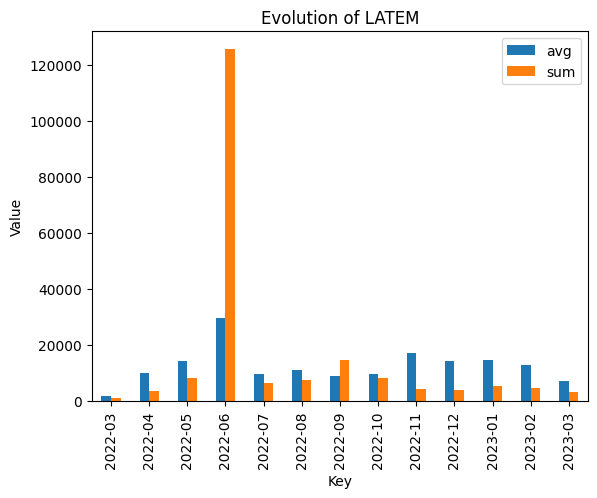

In [ ]:
#Select the shops which evolution you like to see
selected_shops = shop_list
# selected_shops = ['Woluwe']
total_shop = len(shop_list)

display_graphs(considered_state_for_graphs, events_of_shops, selected_shops, total_shop)

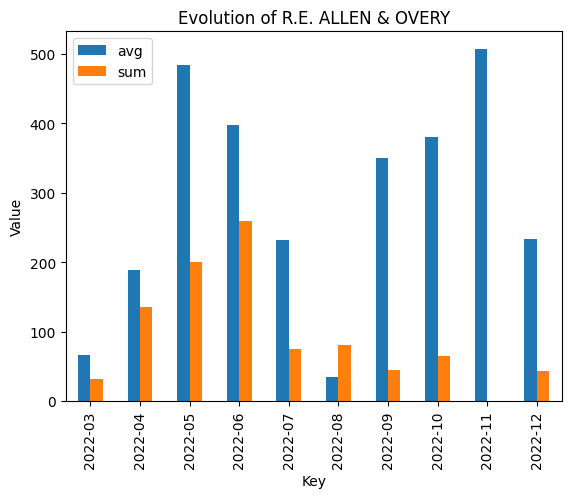

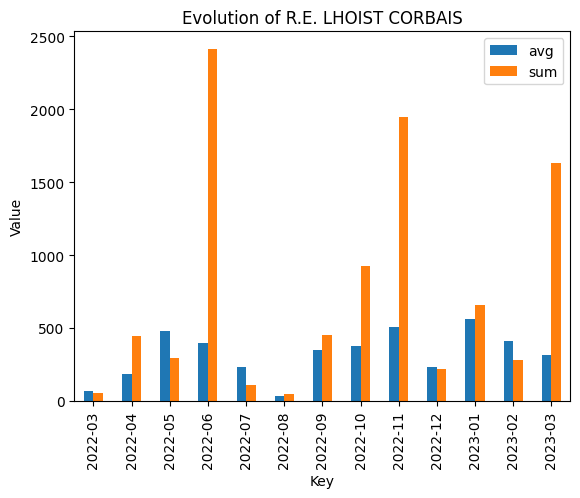

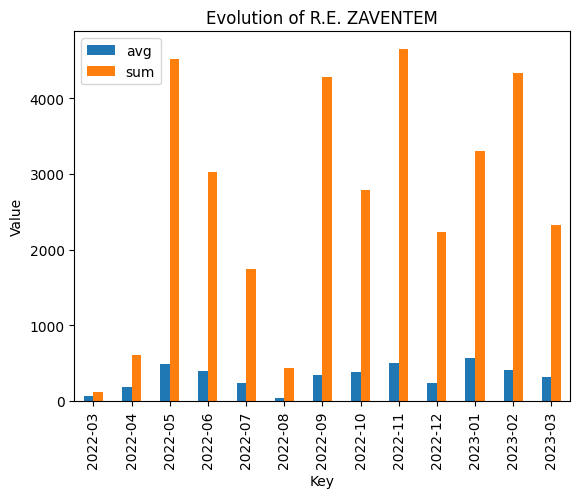

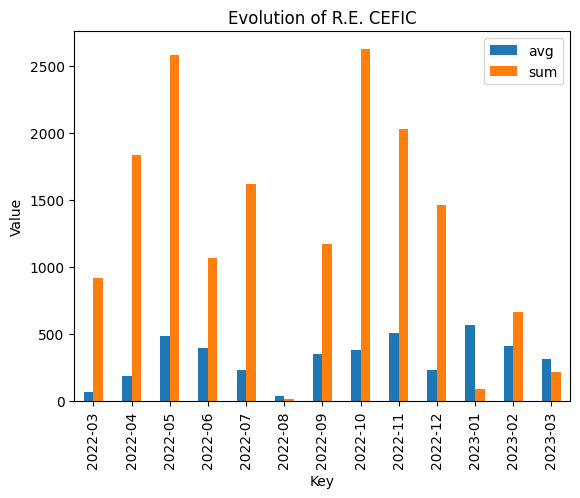

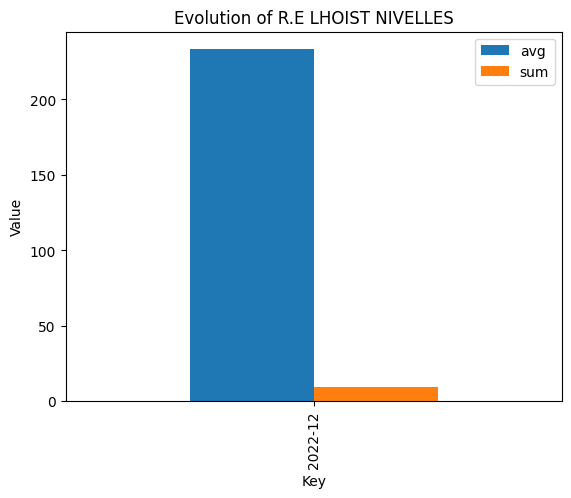

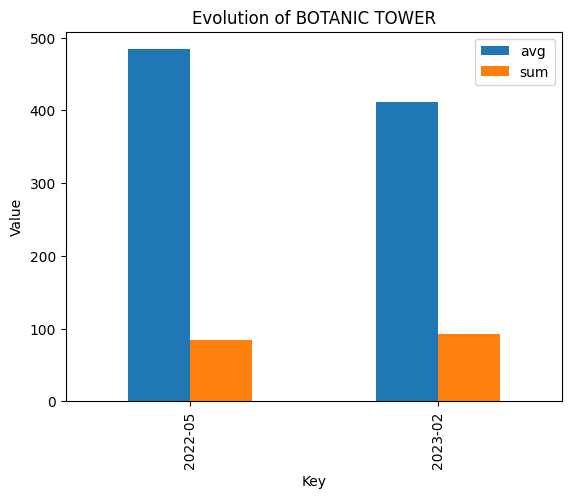

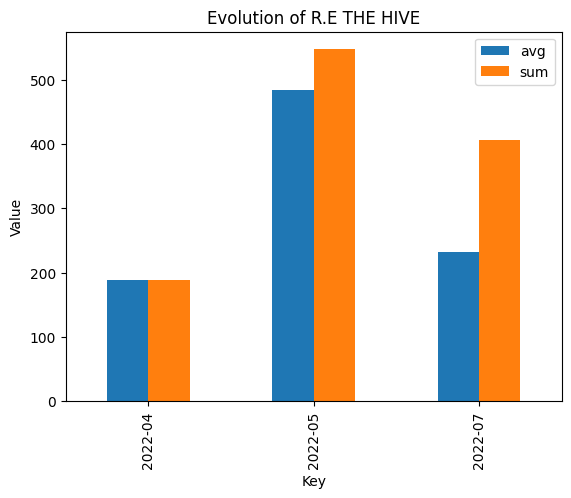

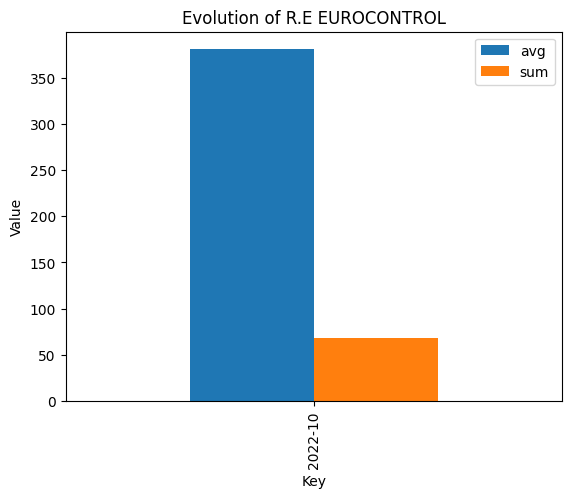

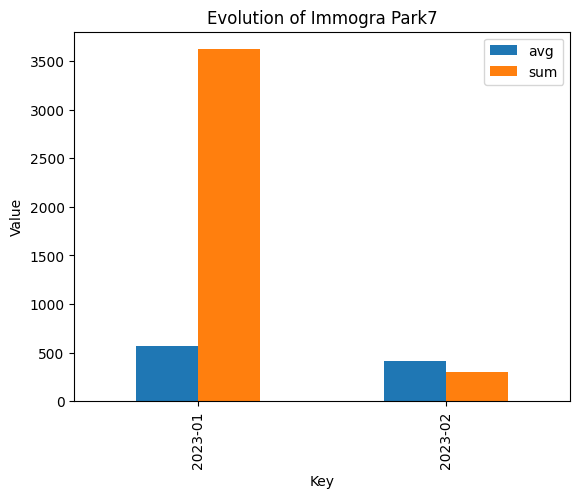

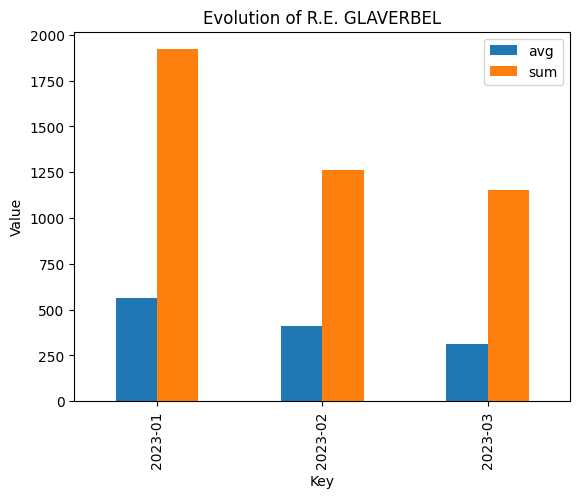

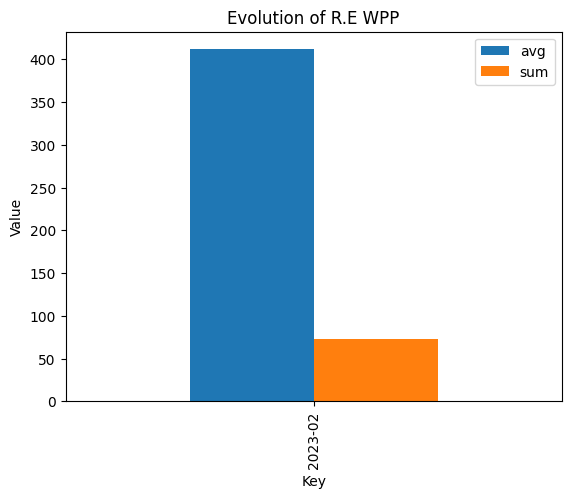

In [ ]:
#Select the which corporate restaurants evolution you like to see
selected_re_restaurants = re_restaurant_list
# selected_re_restaurants = ['R.E. GLAVERBEL']
total_re_restaurant = len(re_restaurant_list)

display_graphs(considered_state_for_graphs, events_of_re_restaurant, selected_re_restaurants, total_re_restaurant)